/var/folders/zh/rlvxg81x4rd8v5wd51dmxb3h0000gn/T/ipykernel_40291/1693984449.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


                     PName POS Team  Age  GP   W   L     Min   PTS  FGM  ...  \
0             Jayson Tatum  SF  BOS   25  74  52  22  2732.2  2225  727  ...   
1              Joel Embiid   C  PHI   29  66  43  23  2284.1  2183  728  ...   
2              Luka Doncic  PG  DAL   24  66  33  33  2390.5  2138  719  ...   
3  Shai Gilgeous-Alexander  PG  OKC   24  68  33  35  2416.0  2135  704  ...   
4    Giannis Antetokounmpo  PF  MIL   28  63  47  16  2023.6  1959  707  ...   

   REB  AST  TOV  STL  BLK   PF    FP  DD2  TD3  +/-  
0  649  342  213   78   51  160  3691   31    1  470  
1  670  274  226   66  112  205  3706   39    1  424  
2  569  529  236   90   33  166  3747   36   10  128  
3  329  371  192  112   65  192  3425    3    0  149  
4  742  359  246   52   51  197  3451   46    6  341  

[5 rows x 30 columns]


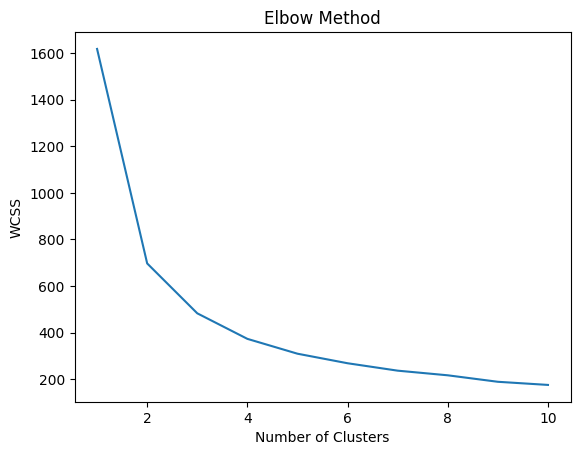

Cluster Centers:
           PTS         AST         REB
0   725.803371  134.870787  314.117978
1   155.494700   34.628975   70.621908
2  1396.525641  365.025641  396.923077

Clustered Data:
                       PName  Cluster  Distance
0               Jayson Tatum        2  2.174654
1                Joel Embiid        2  2.291764
2                Luka Doncic        2  2.172992
3    Shai Gilgeous-Alexander        2  1.531085
4      Giannis Antetokounmpo        2  2.211003
..                       ...      ...       ...
534         Alondes Williams        1  0.562219
535            Deonte Burton        1  0.565986
536            Frank Jackson        1  0.554823
537       Michael Foster Jr.        1  0.565986
538           Sterling Brown        1  0.529160

[539 rows x 3 columns]


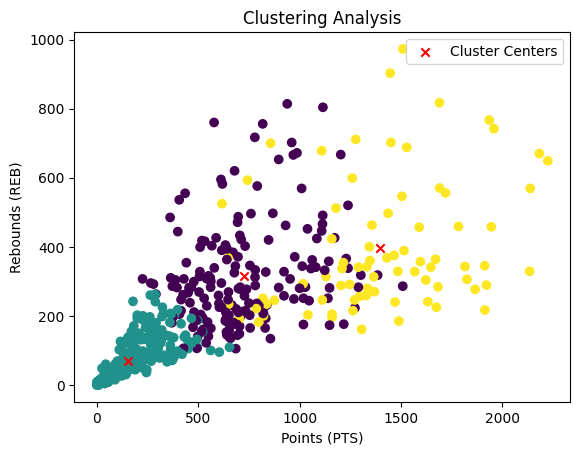

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset from CSV
file_path = "2023_nba_player_stats.csv"  # Replace "basketball_dataset.csv" with your file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Select relevant features for clustering
features = ['PTS', 'AST', 'REB']  # You can include more features as needed

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Determine optimal k value using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

# Choose the optimal k value (elbow point)
k = 3  # Adjust this value based on the Elbow Method graph

# Perform KMeans clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df['Distance'] = kmeans.transform(scaled_data).min(axis=1)  # Distance from cluster center

# Display cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers:")
print(cluster_centers_df)

# Display clustered data
print("\nClustered Data:")
print(df[['PName', 'Cluster', 'Distance']])

# Plot clustered data (for 2D visualization)
plt.scatter(df['PTS'], df['REB'], c=df['Cluster'], cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 2], marker='x', color='red', label='Cluster Centers')
plt.xlabel('Points (PTS)')
plt.ylabel('Rebounds (REB)')
plt.title('Clustering Analysis')
plt.legend()
plt.show()


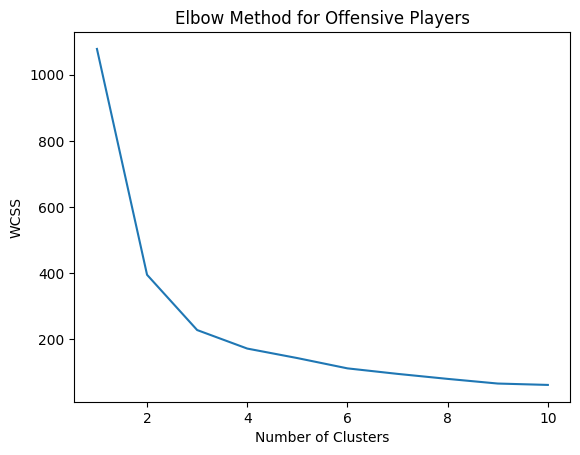

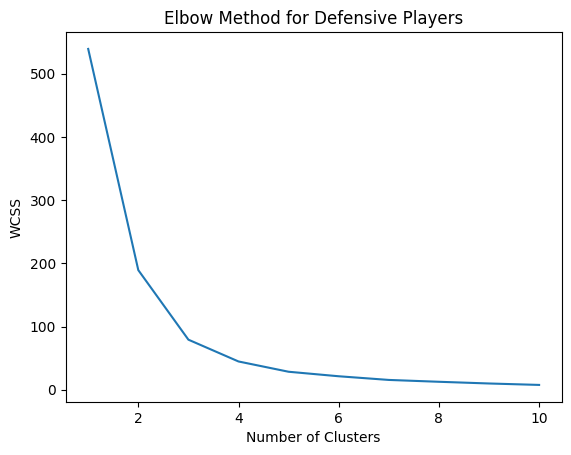

Offensive Player Clusters:
                       PName  OffensiveCluster
0               Jayson Tatum                 2
1                Joel Embiid                 2
2                Luka Doncic                 2
3    Shai Gilgeous-Alexander                 2
4      Giannis Antetokounmpo                 2
..                       ...               ...
534         Alondes Williams                 0
535            Deonte Burton                 0
536            Frank Jackson                 0
537       Michael Foster Jr.                 0
538           Sterling Brown                 0

[539 rows x 2 columns]

Defensive Player Clusters:
                       PName  DefensiveCluster
0               Jayson Tatum                 0
1                Joel Embiid                 0
2                Luka Doncic                 0
3    Shai Gilgeous-Alexander                 0
4      Giannis Antetokounmpo                 0
..                       ...               ...
534         Alondes Williams

In [4]:
# Offensive player clustering
offensive_features = ['PTS', 'AST']

# Standardize the data
offensive_scaled_data = scaler.fit_transform(df[offensive_features])

# Determine optimal k value using the Elbow Method
offensive_wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(offensive_scaled_data)
    offensive_wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph for offensive players
plt.plot(range(1, 11), offensive_wcss)
plt.title('Elbow Method for Offensive Players')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

# Choose the optimal k value (elbow point) for offensive players
offensive_k = 3  # Adjust this value based on the Elbow Method graph

# Perform KMeans clustering for offensive players
offensive_kmeans = KMeans(n_clusters=offensive_k, init='k-means++', random_state=42)
df['OffensiveCluster'] = offensive_kmeans.fit_predict(offensive_scaled_data)

# Defensive player clustering
defensive_features = ['REB',['BLK'],['STL']]

# Standardize the data
defensive_scaled_data = scaler.fit_transform(df[defensive_features])

# Determine optimal k value using the Elbow Method
defensive_wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(defensive_scaled_data)
    defensive_wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph for defensive players
plt.plot(range(1, 11), defensive_wcss)
plt.title('Elbow Method for Defensive Players')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

# Choose the optimal k value (elbow point) for defensive players
defensive_k = 2  # Adjust this value based on the Elbow Method graph

# Perform KMeans clustering for defensive players
defensive_kmeans = KMeans(n_clusters=defensive_k, init='k-means++', random_state=42)
df['DefensiveCluster'] = defensive_kmeans.fit_predict(defensive_scaled_data)

# Display results for offensive and defensive players
print("Offensive Player Clusters:")
print(df[['PName', 'OffensiveCluster']])
print("\nDefensive Player Clusters:")
print(df[['PName', 'DefensiveCluster']])
